In [1]:
#### depends on :
#### - iva_occupacy*.xlsx : https://portal.icuregswe.org/utdata/sv/report/prod.belaggning - 
##  update iva_occupacy_2020_YTD

#### - iva.xlxs : https://portal.icuregswe.org/utdata/sv/report/demo.antalvtf ; select years 2015-2020
#### - gruppera på månad

#### - iva_age_2020.xlsx : https://portal.icuregswe.org/utdata/sv/report/demo.alder-kon ; select 2020
#### - iva_days*.xlsx : https://portal.icuregswe.org/utdata/sv/report/prod.vardtid-grupp ; select 2020
#### - iva_icd_codes_2020.xlsx : https://portal.icuregswe.org/utdata/sv/report/prod.diagnoser-antal select 2020 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()

In [2]:
#### PARAM : when new data has been downloaded to iva_occupacy_2020_YTD, set param to True. Run ONCE, then set 
#### param to False until next time new data has been downloaded.

READ_NEW_DATA = True

In [3]:
#https://portal.icuregswe.org/utdata/sv/report/prod.belaggning

def read_beds(filename,sheetname):
    df = pd.read_excel(filename,sheet_name=sheetname,skiprows=1,
                        parse_dates=True,index_col=0)
    
    return df

In [4]:
def iva_datetime_idx(df):
    
    def to_eng_month(m):
        class MonthError(Exception):
            pass
    
        if m == 'Januari' : return 'January'
        if m == 'Februari' : return 'February'
        if m == 'Mars' : return 'March'
        if m == 'April' : return 'April'
        if m == 'Maj' : return 'May'
        if m == 'Juni' : return 'June'
        if m == 'Juli' : return 'July'
        if m == 'Augusti' : return 'August'
        if m == 'September' : return 'September'
        if m == 'Oktober' : return 'October'
        if m == 'November' : return 'November'
        if m == 'December' : return 'December'
    
        raise MonthError('cant translate {}'.format(m))
    
    df[['month','year']] = df['Månad'].str.split(' ',expand=True)

    df['month'] = df['month'].apply(to_eng_month)
    
    idx = pd.date_range('2015-01-01',freq='M',periods=len(df))
    df.index = idx
    
    return df

In [5]:
#### previous years ####
df_beds_15 = read_beds('iva_occupacy_15.xlsx','Utdataportalen')
df_beds_16 = read_beds('iva_occupacy_16.xlsx','Utdataportalen')
df_beds_17 = read_beds('iva_occupacy_17.xlsx','Utdataportalen')
df_beds_18 = read_beds('iva_occupacy_18.xlsx','Utdataportalen')
df_beds_19 = read_beds('iva_occupacy_19.xlsx','Utdataportalen')

In [6]:
#### update with 2020 fresh data

df_beds_YTD = pd.concat([df_beds_15,df_beds_16,df_beds_17,df_beds_18,df_beds_19])

# drop previous 2020 data
#df_beds_YTD = df_beds_YTD[~(df_beds_YTD.index.year==2020)]

df_beds_2020_YTD = read_beds('iva_occupacy_2020_YTD.xlsx','Data portal')
df_beds_2020_YTD.rename(columns={'Beds' : 'Platser'},inplace=True)
df_beds_YTD = pd.concat([df_beds_YTD,df_beds_2020_YTD])

df_beds_YTD

,Platser
2015-01-01 00:00:00,310
2015-01-01 00:05:00,311
2015-01-01 00:10:00,313
2015-01-01 00:21:00,314
2015-01-01 00:49:00,315
...,...
2020-12-31 23:40:00,534
2020-12-31 23:45:00,533
2020-12-31 23:50:00,532
2020-12-31 23:55:00,532


In [7]:
df_beds_YTD.describe()

,Platser
count,353526.000000
mean,351.203957
std,66.259967
min,0.000000
25%,317.000000
50%,341.000000
75%,365.000000
max,771.000000


In [8]:
df_beds_YTD.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 353526 entries, 2015-01-01 00:00:00 to 2020-12-31 23:59:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   Platser  353526 non-null  int64
dtypes: int64(1)
memory usage: 5.4 MB


In [9]:
last_timestamp = df_beds_YTD.iloc[-1].name
back_2_months = last_timestamp - pd.DateOffset(months=2)
last_timestamp

Timestamp('2020-12-31 23:59:00')

In [10]:
#stored_beds = stored_beds[pd.Timestamp('2020-12-02').date()]


In [11]:
#stored_beds.to_pickle('iva_stored_beds.pkl')

In [12]:
stored_beds = pd.read_pickle('iva_stored_beds.pkl')


In [13]:
if READ_NEW_DATA:
    new_data = df_beds_YTD.resample('D').mean()
    new_data.rename(columns={'Platser' : last_timestamp.date()},inplace=True)
    stored_beds = pd.concat([stored_beds,new_data],axis=1)
    stored_beds.to_pickle('iva_stored_beds.pkl')


In [14]:


stored_beds

,2020-12-02,2020-12-03,2020-12-07,2020-12-14,2020-12-15,2020-12-22,2020-12-31,2020-12-31,2020-12-31
Datum,,,,,,,,,
2015-01-01,327.0,327.025000,327.025000,327.025000,327.025000,327.025000,327.025000,327.025000,327.025000
2015-01-02,320.0,320.294872,320.294872,320.294872,320.294872,320.294872,320.294872,320.294872,320.294872
2015-01-03,329.0,328.975610,328.975610,328.975610,328.975610,328.975610,328.975610,328.975610,328.975610
2015-01-04,330.0,330.467949,330.467949,330.467949,330.467949,330.467949,330.467949,330.467949,330.467949
2015-01-05,338.0,337.972414,337.972414,337.972414,337.972414,337.972414,337.972414,337.972414,337.972414
...,...,...,...,...,...,...,...,...,...
2020-12-27,NaN,NaN,NaN,NaN,NaN,NaN,404.250000,528.718310,528.718310
2020-12-28,NaN,NaN,NaN,NaN,NaN,NaN,406.554140,545.947977,545.947977
2020-12-29,NaN,NaN,NaN,NaN,NaN,NaN,405.822086,556.139665,556.139665


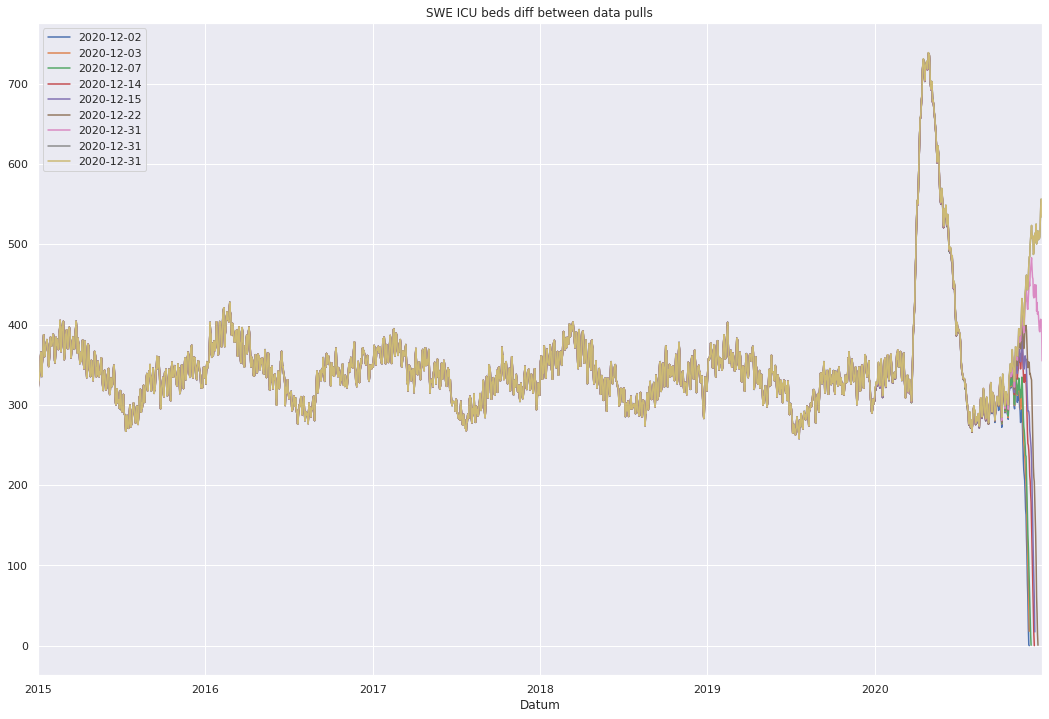

In [15]:

title = "SWE ICU beds diff between data pulls"

stored_beds.plot(figsize=(18,12),title=title)
plt.savefig('swe_iva_bed_update_diff_full.jpg',format='jpg')

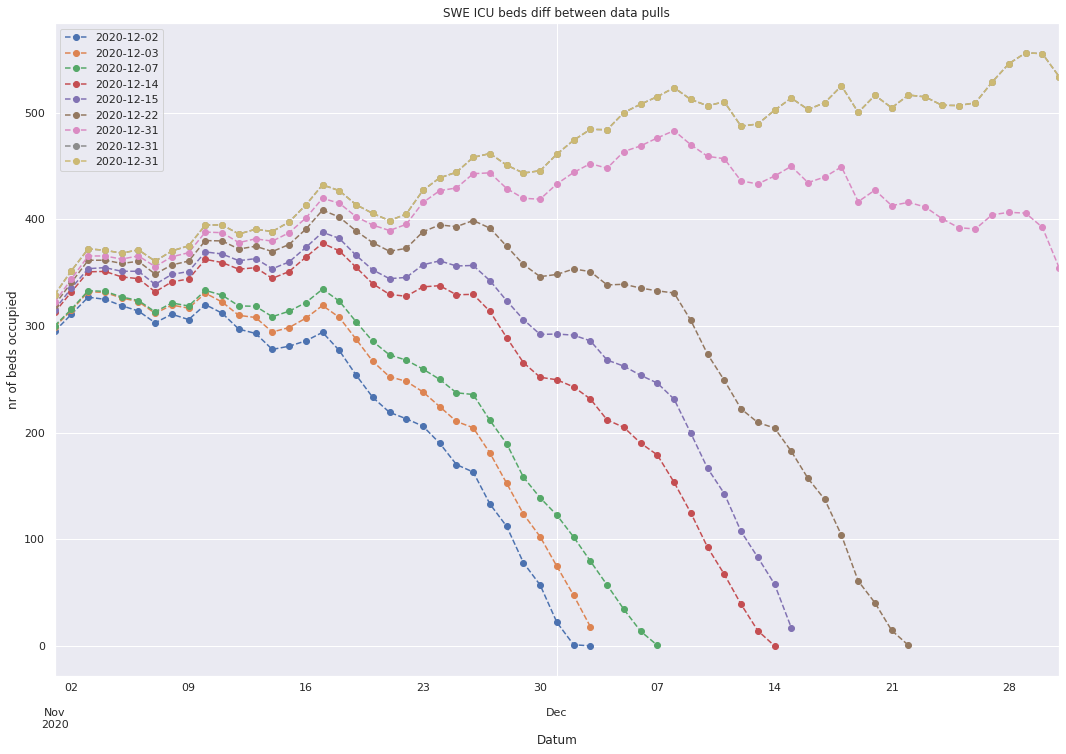

In [16]:
# zoom into the last two months


title = "SWE ICU beds diff between data pulls"
stored_beds[back_2_months:].plot(style='o--',figsize=(18,12),title=title)
plt.ylabel('nr of beds occupied')
plt.savefig('swe_iva_bed_update_diff.jpg',format='jpg')

In [17]:
if READ_NEW_DATA:

    stored_beds = np.round(stored_beds)
    stored_beds = stored_beds.replace(np.nan,0)
    stored_beds = stored_beds.astype(int)
    print (stored_beds)

            2020-12-02  2020-12-03  2020-12-07  2020-12-14  2020-12-15  \
Datum                                                                    
2015-01-01         327         327         327         327         327   
2015-01-02         320         320         320         320         320   
2015-01-03         329         329         329         329         329   
2015-01-04         330         330         330         330         330   
2015-01-05         338         338         338         338         338   
...                ...         ...         ...         ...         ...   
2020-12-27           0           0           0           0           0   
2020-12-28           0           0           0           0           0   
2020-12-29           0           0           0           0           0   
2020-12-30           0           0           0           0           0   
2020-12-31           0           0           0           0           0   

            2020-12-22  2020-12-31  2

In [18]:
if READ_NEW_DATA:

    latest = stored_beds.iloc[:,-1]
    old = stored_beds.iloc[:,:-1]



In [19]:

if READ_NEW_DATA:

    old_cols = old.columns
    old_cols

    for col in old_cols:
        mask = latest != old[col]
        diff = latest[mask].sub(old[col][mask],axis=0)
        print (col, ': dates with diffs > 15 (~5%) from old records\n',diff[diff > 15])

2020-12-02 : dates with diffs > 15 (~5%) from old records
 Datum
2020-10-14     17
2020-10-15     17
2020-10-16     17
2020-10-17     19
2020-10-18     18
             ... 
2020-12-27    529
2020-12-28    546
2020-12-29    556
2020-12-30    555
2020-12-31    534
Length: 79, dtype: int64
2020-12-03 : dates with diffs > 15 (~5%) from old records
 Datum
2020-10-17     17
2020-10-18     16
2020-10-20     16
2020-10-21     19
2020-10-22     20
             ... 
2020-12-27    529
2020-12-28    546
2020-12-29    556
2020-12-30    555
2020-12-31    534
Length: 75, dtype: int64
2020-12-07 : dates with diffs > 15 (~5%) from old records
 Datum
2020-10-21     17
2020-10-22     18
2020-10-23     17
2020-10-24     17
2020-10-25     19
             ... 
2020-12-27    529
2020-12-28    546
2020-12-29    556
2020-12-30    555
2020-12-31    534
Length: 72, dtype: int64
2020-12-14 : dates with diffs > 15 (~5%) from old records
 Datum
2020-11-01     16
2020-11-02     20
2020-11-03     21
2020-11-04     20

ValueError: cannot reindex from a duplicate axis

In [ ]:
last_date = df_beds_YTD.index[-1]
print (last_date)
last_good_date = last_date - pd.DateOffset(days=0)
last_good_date

In [ ]:
df_beds_YTD = df_beds_YTD.loc[:last_good_date]
df_beds_YTD

In [ ]:
new_year_eve = (df_beds_YTD.index.month == 12) & (df_beds_YTD.index.day == 31) & \
                                                 (df_beds_YTD.index.hour == 23) & \
                                                (df_beds_YTD.index.minute == 59)
df_beds_YTD[new_year_eve]

In [ ]:
avg_daily_beds = df_beds_YTD.resample('D').mean()
avg_daily_beds

In [ ]:
avg_daily_beds_15_19  = avg_daily_beds.loc[:'2019-12-31'].groupby(
    [avg_daily_beds.loc[:'2019-12-31'].index.month,avg_daily_beds.loc[:'2019-12-31'].index.day]).mean()

print (avg_daily_beds_15_19[(avg_daily_beds_15_19.index.get_level_values(0) == 2) \
                     & (avg_daily_beds_15_19.index.get_level_values(1) == 29)])

avg_daily_beds_15_19_no_leap = avg_daily_beds_15_19.drop((2,29),axis=0)
avg_daily_beds_15_19_no_leap

In [ ]:
yearly_day_avg = pd.concat([avg_daily_beds_15_19_no_leap['Platser'].reset_index(drop=True),
                            avg_daily_beds_15_19['Platser'].reset_index(drop=True),
                            pd.Series(np.tile(avg_daily_beds_15_19_no_leap['Platser'].reset_index(drop=True),3)),
                           avg_daily_beds_15_19['Platser'].reset_index(drop=True)])
                            
yearly_day_avg 


In [ ]:
idx = pd.date_range('2015-01-01','2020-12-31',freq='D')

In [ ]:
yearly_day_avg.index = idx
yearly_day_avg

In [ ]:
title = 'SWEDEN ICU avg daily occupancy 2015 - YTD {} cmp daily average 2015-2019'.format(last_good_date.date())
ax = yearly_day_avg.plot(figsize=(18,12),color='orange',title=title)
avg_daily_beds.plot(ax=ax)

plt.legend(['2015-2019 average per day of year','actuals'])
plt.ylabel('occupancy')
plt.xlabel('date')
plt.ylim([0,750])
plt.savefig('swe_iva_2015-2020_ytd.jpg',format='jpg')

In [ ]:
500/350

In [ ]:
avg_daily_beds

In [ ]:
ax = yearly_day_avg.loc['2020-11-01' : '2020-11-30'].plot(figsize=(18,12),label='baseline',color='orange')
avg_daily_beds.loc['2020-11-01' : '2020-11-30','Platser'].plot(color='b',ax=ax,label='2020')
plt.ylim([0,600])
plt.legend(loc='upper left')

In [ ]:
nov_2020_beds = avg_daily_beds.loc['2020-11-01' : '2020-11-30','Platser']
nov_baseline_beds = yearly_day_avg.loc['2020-11-01' : '2020-11-30']

pct_diff = nov_2020_beds / nov_baseline_beds
pct_diff

In [ ]:
title = 'SWEDEN Growth factor ICU daily avg. occupacy Nov 2020 vs Nov baseline 2015-2019\nDataSource : Svenska Intensivvårdsregistret'
pct_diff.plot(figsize=(18,12),title=title,style='o--')
plt.axhline(1,ls='dashed',color='k')
plt.ylabel('Growth factor')
plt.savefig('swe_icu_november_growth.jpg',format='jpg')

In [ ]:
avg_weekly_beds = avg_daily_beds.resample('W').mean()
avg_weekly_beds

In [ ]:
last_week = avg_weekly_beds.index[-2].date()

title = 'SWEDEN weekly avg daily ICU bed usage YTD {}'.format(last_week)
avg_weekly_beds[:last_week].plot(figsize=(18,12),style='o--',title=title)
plt.ylabel('avg daily ICU beds per week')
plt.savefig('iva_avg_daily_beds_per_week.jpg',format='jpg')

In [ ]:
df_icu_transactions = pd.read_excel('iva.xlsx',sheet_name='Data portal',skiprows=1)

In [ ]:
iva_trans = iva_datetime_idx(df_icu_transactions)
iva_trans

In [ ]:
avg_daily_beds

In [ ]:
yearly_beds = avg_daily_beds.groupby(avg_daily_beds.index.year)

In [ ]:
beds_2015_ytd = (yearly_beds.get_group(2015)).loc[:last_good_date].sum()
beds_2016_ytd = (yearly_beds.get_group(2016)).loc[:last_good_date].sum()
beds_2017_ytd = (yearly_beds.get_group(2017)).loc[:last_good_date].sum()
beds_2018_ytd = (yearly_beds.get_group(2018)).loc[:last_good_date].sum()
beds_2019_ytd = (yearly_beds.get_group(2019)).loc[:last_good_date].sum()
beds_2020_ytd = (yearly_beds.get_group(2020)).loc[:last_good_date].sum()

total_yearly_beds_ytd = pd.concat([beds_2015_ytd,beds_2016_ytd,beds_2017_ytd,
                                  beds_2018_ytd,beds_2019_ytd,beds_2020_ytd],axis=1)
total_yearly_beds_ytd.columns = range(2015,2021)

In [ ]:
total_yearly_beds_ytd = total_yearly_beds_ytd.T
total_yearly_beds_ytd

In [ ]:
beds_mean = total_yearly_beds_ytd.mean()
total_yearly_beds_ytd / beds_mean

In [ ]:
foo = avg_daily_beds.groupby(avg_daily_beds.index.year).cumsum()
grps = foo.groupby(foo.index.year)
cum_beds_15 = grps.get_group(2015)
cum_beds_16 = grps.get_group(2016)
cum_beds_17 = grps.get_group(2017)
cum_beds_18 = grps.get_group(2018)
cum_beds_19 = grps.get_group(2019)
cum_beds_20 = grps.get_group(2020)

cum_beds = pd.concat([cum_beds_15.reset_index(drop=True),
                      cum_beds_16.reset_index(drop=True),
                      cum_beds_17.reset_index(drop=True),
                      cum_beds_18.reset_index(drop=True),
                      cum_beds_19.reset_index(drop=True),
                      cum_beds_20.reset_index(drop=True)],axis=1)
cum_beds.index = pd.date_range('2020-01-01','2020-12-31',freq='D')
cum_beds.columns = range(2015,2021)
cum_beds

In [ ]:
cum_beds.loc[:last_date].plot(figsize=(18,12))

In [ ]:
avg_daily_beds['year'] = avg_daily_beds.index.year
avg_daily_beds['month'] = avg_daily_beds.index.month
avg_daily_beds

In [ ]:


### must use pivot_table with its agg func to average monthly values from day based data ###

pivot = avg_daily_beds.pivot_table(index='year',columns='month',values='Platser')
pivot

In [ ]:
pivot.sum(axis=1)

In [ ]:
# the units on y-axis make no sense...!!!!

pivot.plot(kind='bar',stacked=True,figsize=(18,12),title=title)


In [ ]:
### IVA AGE vårdtillfällen aka transactions ####

age_df = pd.DataFrame()

for y in range(2015,2021):
    tmp = pd.read_excel('iva_age_' + str(y)[2:] + '.xlsx','Utdataportalen',skiprows=1)
    print (len(tmp))
    
    tmp['Åldersgrupp'] = pd.Categorical(['0 - 4 år','5 - 9 år','10 - 14 år','15 - 19 år','20 - 24 år',
                                       '25 - 29 år','30 - 34 år','35 - 39 år','40 - 44 år',
                                       '45 - 49 år','50 - 54 år','55 - 59 år','60 - 64 år',
                                       '65 - 69 år','70 - 74 år','75 - 79 år','80 - 84 år',
                                     '85 - 89 år','90 - 94 år','95 - 99 år','100 - 104 år',
                                        '105 - 109 år', '110 - 114 år', '115 - 119 år'])[:len(tmp)]
    
    tmp['year'] = y
    age_df = pd.concat([age_df,tmp])
    

    
age_df

In [ ]:
age_df['iva_count'] = age_df['Antal kvinnor'] + age_df['Antal män']
age_df

In [ ]:
age_pivot = age_df.pivot(index='year',columns=['Åldersgrupp'],values=['iva_count'])
age_pivot

In [ ]:
age_pivot.sum(axis=1)

In [ ]:
#### 2020 YTD, others full year ####

age_pivot.plot(kind='bar',stacked=True,figsize=(18,12))
plt.legend(loc='lower center')

In [ ]:
import requests

url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101A/BefolkningR1860'
data = {
  "query": [
    {
      "code": "Alder",
      "selection": {
        "filter": "agg:Ålder5år",
        "values": [
          "-4",
          "5-9",
          "10-14",
          "15-19",
          "20-24",
          "25-29",
          "30-34",
          "35-39",
          "40-44",
          "45-49",
          "50-54",
          "55-59",
          "60-64",
          "65-69",
          "70-74",
          "75-79",
          "80-84",
          "85-89",
          "90-94",
          "95-99",
          "100+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2014",  
          "2015",
          "2016",
          "2017",
          "2018",
          "2019"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [ ]:
r = requests.post(url,json=data)
r.status_code

In [ ]:
json = r.json()
json['data'][0]

In [ ]:
items = len(json['data'])
data_list = []

for i in range(items):
    tmp = list([json['data'][i]['key'][0],json['data'][i]['key'][1],json['data'][i]['key'][2],
               json['data'][i]['values'][0]])
    
    data_list.append(tmp)
    
data_list

pop_df = pd.DataFrame(data_list)
pop_df.columns = ['age','gender','year','pop']
pop_df['age'] = pd.Categorical(pop_df['age'],['-4','5-9','10-14','15-19','20-24',
                                             '25-29','30-34','35-39','40-44',
                                             '45-49','50-54','55-59','60-64','65-69',
                                             '70-74','75-79','80-84','85-89',
                                             '90-94','95-99','100+'])
pop_df

In [ ]:
pop_df['pop'] = pop_df['pop'].astype(int)
pop_df = pop_df.groupby(['year','age']).sum()
pop_df

In [ ]:
pop_df.groupby(pop_df.index.get_level_values(0)).sum()

In [ ]:
pop_df = pop_df.unstack()
pop_df.index = range(2015,2021)
pop_df.info()

In [ ]:
pop_df.sum(axis=1)

In [ ]:
pop_df = pop_df.unstack().reset_index().drop('level_0',axis=1).pivot(index='level_2',columns='age',values=0)
pop_df

In [ ]:
age_pivot = age_pivot.unstack().reset_index().drop('level_0',axis=1).pivot(index='year',columns='Åldersgrupp',
                                                              values=0)
age_pivot

In [ ]:
hundred_plus = age_pivot.loc[:,'100 - 104 år':].sum(axis=1)
hundred_plus

In [ ]:
age_pivot = (age_pivot.loc[:,:'95 - 99 år']).copy()
age_pivot.columns = age_pivot.columns.tolist()
age_pivot

In [ ]:
age_pivot
age_pivot['100+'] = hundred_plus
age_pivot

In [ ]:
age_pivot.sum(axis=1)

In [ ]:
age_pivot.columns = pop_df.columns

In [ ]:
# rel pop of age group
iva_per_age = age_pivot / pop_df
iva_per_age

In [ ]:
iva_per_age.sum(axis=1)

In [ ]:
# age grp proportion of all IVA transactions
iva_per_age_rel = iva_per_age.div(iva_per_age.sum(axis=1),axis=0)
iva_per_age_rel

In [ ]:
iva_per_age_rel.sum(axis=1)

In [ ]:
iva_per_age_rel.T.plot(kind='bar',figsize=(18,12))

In [ ]:
iva_per_age_rel.plot(kind='bar',stacked=True,figsize=(18,12))

In [ ]:
age_grp_rel_avg = iva_per_age_rel.loc[:2019,:].mean()
rel_change = iva_per_age_rel / age_grp_rel_avg
rel_change

In [ ]:
rel_change.plot(kind='bar',figsize=(18,12))
plt.axhline(1,ls='dashed',color='k')

In [ ]:
change_vs_baseline = pd.concat([age_grp_rel_avg,iva_per_age_rel.loc[2020]],axis=1)
change_vs_baseline.rename(columns={0:'2015-2019'},inplace=True)
change_vs_baseline

In [ ]:
change_vs_baseline['change'] = change_vs_baseline[2020] / change_vs_baseline['2015-2019']
change_vs_baseline

In [ ]:
title = 'SWEDEN ICU transactions: change per age group 2020 YTD vs avg 2015-2019'
change_vs_baseline.plot(y='change',kind='bar',figsize=(18,12),color='orange',title=title)
plt.axhline(1,ls='dashed',color='k')
plt.ylabel('change factor')
plt.savefig('swe_iva_age_grp_change.jpg',format='jpg')

In [ ]:
iva_per_age.plot(kind='bar',stacked=True,figsize=(18,12))

In [ ]:
### vårddygn och längd ###

days_df = pd.DataFrame()

for y in range(2015,2021):
    tmp = pd.read_excel('iva_days_' + str(y)[2:] + '.xlsx','Utdataportalen',skiprows=1)
    tmp['year'] = y
    days_df = pd.concat([days_df,tmp])
  

days_df['Vårdtid, dagar'] = pd.Categorical(days_df['Vårdtid, dagar'],
                                          ['< 1','1 - 3','4 - 10','11 - 30','> 30'])    
days_df

In [ ]:
days_pivot = days_df.pivot(index='year',columns='Vårdtid, dagar',
                           values=['Antal vårdtillfällen','Antal vårddygn'])

days_pivot

In [ ]:
days_pivot['Antal vårdtillfällen'].plot(kind='bar',figsize=(18,12))

In [ ]:
icd_df = pd.DataFrame()

for y in range(2015,2021):
    tmp = pd.read_excel('iva_icd_codes_' + str(y)[2:] + '.xlsx','Utdataportalen',skiprows=1)
    print (len(tmp))
    
    tmp['year'] = y
    icd_df = pd.concat([icd_df,tmp])
    


In [ ]:
icd_df

In [ ]:
(icd_df.loc[icd_df['year'] != 2020]).mean()

In [ ]:
icd_year_grp = icd_df.groupby(['year','Huvudsaklig IVA-diagnos']).mean()
g = icd_year_grp.groupby('year',group_keys=False)
sorted_vtf = g.apply(lambda x : x.sort_values('Antal vtf',ascending=False).head(10))
sorted_beds = g.apply(lambda x : x.sort_values('Antal dygn',ascending=False).head(10))

all_sorted_vtf = g.apply(lambda x : x.sort_values('Antal vtf',ascending=False))
all_sorted_vtf['rank'] = all_sorted_vtf.groupby('year')['Antal vtf'].rank(ascending=False)

sorted_vtf['rank'] = sorted_vtf.groupby('year')['Antal vtf'].rank(ascending=False)
sorted_beds['rank'] = sorted_beds.groupby('year')['Antal dygn'].rank(ascending=False)

sorted_vtf

In [ ]:
sorted_beds

In [ ]:
color_factor = 10
color_15 = ['g'] * 10
color_16 = ['yellow'] * 10
color_17 = ['darkorange'] * 10
color_18 = ['magenta'] * 10
color_19 = ['k'] * 10
color_20 = ['crimson'] * 10

colors = color_15 + color_16 + color_17 + color_18 + color_19 + color_20

data_source = 'https://www.icuregswe.org/'
title = 'SWEDEN Top-10 yearly ICU transactions by diagnosis 2015-2019, cmp YTD {}\nDataSource {}'.format(
    last_good_date.date(),data_source)

sorted_vtf.plot(y='Antal vtf',kind='bar',figsize=(18,12),color=colors,title=title,legend=False)
plt.ylabel('nr of ICU transactions')
plt.xlabel('Huvudsaklig diagnos')
plt.savefig('swe_iva_top_10_trans.jpg',format='jpg')

In [ ]:
data_source = 'https://www.icuregswe.org/'
title = 'SWEDEN Top-10 yearly ICU days by diagnosis 2015-2019, cmp YTD {}\nDataSource {}'.format(
    last_good_date.date(),data_source)

sorted_vtf.plot(y='Antal dygn',kind='bar',figsize=(18,12),color=colors,title=title,legend=False)
plt.ylabel('nr of ICU days')
plt.xlabel('Huvudsaklig diagnos')
plt.savefig('swe_iva_top_10_days.jpg',format='jpg')

In [ ]:
icd_pivot = icd_df.pivot(index='year',columns='Huvudsaklig IVA-diagnos',values='Antal vtf')
icd_pivot.T

In [ ]:
icd_pivot.plot(figsize=(18,12),style='o--')
plt.legend(loc='lower center')

In [ ]:
sorted_vtf

In [ ]:
top_10_pivot_rank = sorted_vtf.reset_index().pivot(index='year',columns='Huvudsaklig IVA-diagnos',values='rank')
#top_10_pivot_rank = top_10_pivot_rank.replace(np.nan,0)
top_10_pivot_rank


In [ ]:
colors = ['white','grey','yellow',
          'gold','darkorange','sandybrown','crimson','k',
          'red','blue','olive','lime','magenta','cyan','silver']

cols = top_10_pivot_rank.columns

color_dict = dict(zip(cols,colors))


[color_dict.get(x) for x in cols]


In [ ]:


plt.figure(figsize=(18,12))
ax = plt.gca()

title = 'SWEDEN ICU Top-10 transaction diagnosis trends 2015-2019 & YTD {}\nDataSource : {}'.format(
    last_good_date.date(),data_source)

top_10_pivot_rank.plot(ax=ax,color=[color_dict.get(x) for x in cols],
                       ls='dashdot',marker='o',title=title)

plt.legend(loc='lower left')
plt.gca().invert_yaxis()
plt.ylabel('rank')
_= plt.yticks(range(1,11,1))
plt.savefig('swe_iva_top_10_rank.jpg',format='jpg')

In [ ]:
top_10_pivot_vtf = sorted_vtf.reset_index().pivot(index='year',columns='Huvudsaklig IVA-diagnos',
                                                  values='Antal vtf')
top_10_pivot_vtf


In [ ]:
top_10_pivot_vtf.plot(style='o--',figsize=(18,12))
plt.legend(loc='lower left')
#plt.gca().invert_yaxis()


In [ ]:
all_sorted_vtf

In [ ]:
for y in range(2015,2021):
    
    print (all_sorted_vtf.loc[all_sorted_vtf.index.get_level_values(0) == y,'rank'])
    print()

In [ ]:
title = 'SWEDEN ICU Top-10 transaction diagnosis,avg nr days in care, trends 2015-2019 & YTD {}\nDataSource : {}'.format(
    last_good_date.date(),data_source)
sorted_vtf.unstack()['Medel dygn'].plot(color=[color_dict.get(x) for x in cols],figsize=(18,12),
                                       ls='dashed',marker='o',title=title)

plt.ylabel('Avg days of ICU treatment')
plt.savefig('swe_iva_top_10_avg_days.jpg',format='jpg')


In [ ]:
age_pivot['-4'] / pop_df['-4']

In [ ]:
iva_per_age_rel

In [ ]:
std_pop = pop_df.loc[2019]
std_pop

In [ ]:
age_pivot

In [ ]:
std_cases = (iva_per_age_rel * std_pop).sum(axis=1)
std_cases

In [ ]:
std_cases_avg = std_cases.loc[2015:2019].mean()
std_cases_avg

In [ ]:
std_cases.loc[2020] / std_cases_avg

In [ ]:
iva_per_age
